In [57]:
import numpy as np
import sempler
import sempler.generators
import src.utils as utils
import src.metrics as metrics

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import gridspec

import pickle
import os


import time

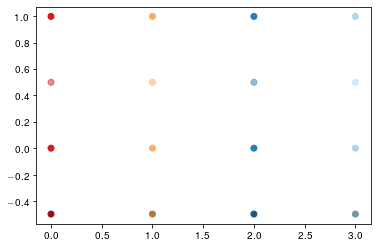

In [58]:
# Set tex formatting for plots
from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Computer Modern Roman']})
rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{helvet}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
]  
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern Roman"]

# Set legend size
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')
# Colors
def to_rgb(H, b=1, a=1):
    RGBa = []
    for h in H:
        h = h.lstrip("#")
        RGBa.append(tuple(int(h[i:i+2], 16) / 256 * b for i in (0, 2, 4)) + (a,))
    return np.array(RGBa)

cmap = matplotlib.cm.get_cmap('tab20')
base = ['#d7191c', '#fdae61', '#2c7bb6', '#abd9e9']
plt.scatter(np.arange(len(base)), np.ones(len(base)), c = base)
colors = to_rgb(base)
colorsa = to_rgb(base, a=0.5)
colorsb = to_rgb(base, b=0.7)
plt.scatter(np.arange(len(colors)), np.zeros(len(colors)), c = colors)
plt.scatter(np.arange(len(colors)), np.ones(len(colors))*0.5, c = colorsa)
plt.scatter(np.arange(len(colors)), np.ones(len(colors))*-0.5, c = colorsb)

In [59]:
directory = "synthetic_experiments/dataset_1656422452_runs:10_seed:42_G:100_k:2.7_p:10_w_min:0.5_w_max:1_v_min:1_v_max:2_envs:4_i_type:noise_i_size:1_i_v_min:5_i_v_max:10_n:10,100,1000/"

In [60]:
test_cases = utils.read_pickle(directory + 'test_cases.pickle')
gnies_args, gnies_results = utils.read_pickle(directory + "compiled_results_gnies.pickle")
ut_igsp_args, ut_igsp_results = utils.read_pickle(directory + "compiled_results_ut_igsp.pickle")
ground_truth, computed_metrics = utils.read_pickle(directory + "metrics.pickle")

In [61]:
computed_metrics.keys()

dict_keys(['gnies', 'ut_igsp'])

In [62]:
computed_metrics['gnies'].keys()

dict_keys([<function type_1_structc at 0x7f6277df3f80>, <function type_2_structc at 0x7f6277df7710>, <function type_1_skeleton at 0x7f6277db4e60>, <function type_2_skeleton at 0x7f6277db4ef0>, <function type_1_I at 0x7f6277e244d0>, <function type_2_I at 0x7f6277db4cb0>, <function recovered_icpdag at 0x7f627a3fcef0>, 'times'])

In [63]:
Ns = sorted(test_cases['Ns'])

In [64]:
gnies_lambdas = gnies_args[2]
gnies_lambdas

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [65]:
ut_igsp_args

(Namespace(alpha_hi=0.1, alpha_lo=1e-05, beta_hi=0.1, beta_lo=1e-05, chunksize=1, compile_only=False, debug=False, directory='/cluster/scratch/gajuan/synthetic_experiments/dataset_1656422452_copy_2/', n_alphas=10, n_betas=10, n_workers=49),
 array([1.000e-05, 1.112e-02, 2.223e-02, 3.334e-02, 4.445e-02, 5.556e-02,
        6.667e-02, 7.778e-02, 8.889e-02, 1.000e-01]),
 array([1.000e-05, 1.112e-02, 2.223e-02, 3.334e-02, 4.445e-02, 5.556e-02,
        6.667e-02, 7.778e-02, 8.889e-02, 1.000e-01]),
 [10, 100, 1000])

In [66]:
utigsp_alphas, utigsp_betas = ut_igsp_args[1], ut_igsp_args[2]
utigsp_alphas, utigsp_betas

(array([1.000e-05, 1.112e-02, 2.223e-02, 3.334e-02, 4.445e-02, 5.556e-02,
        6.667e-02, 7.778e-02, 8.889e-02, 1.000e-01]),
 array([1.000e-05, 1.112e-02, 2.223e-02, 3.334e-02, 4.445e-02, 5.556e-02,
        6.667e-02, 7.778e-02, 8.889e-02, 1.000e-01]))

## Recovery of I-CPDAG

In [68]:
gnies_y = np.nanmean(computed_metrics['gnies'][metrics.recovered_icpdag], axis=(0,3))
utigsp_y = np.nanmean(computed_metrics['ut_igsp'][metrics.recovered_icpdag], axis=(0,4))

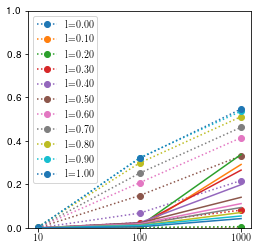

In [69]:
plt.figure(figsize=(4,4))
ax = plt.gca()

x_axis = range(len(Ns))
# Plot GnIES
for i,l in enumerate(gnies_lambdas):    
    ax.plot(x_axis, gnies_y[i,:], label="l=%0.2f" % l, marker='o', linestyle=':')

        
# Plot UT-IGSP
for j,a in enumerate(utigsp_alphas):
    for k,b in enumerate(utigsp_betas):
        if j==k:
            ax.plot(x_axis, utigsp_y[j,k,:])            

ax.set_ylim([0,1])
ax.set_xticks(x_axis)
ax.set_xticklabels(Ns)
plt.legend()

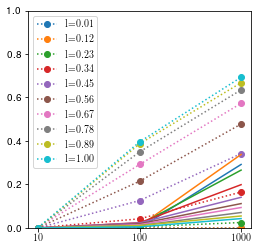

## Full trajectories

### Class recovery

In [70]:
gnies_x = np.nanmean(computed_metrics['gnies'][metrics.type_1_structc], axis=(0,3))
gnies_y = np.nanmean(computed_metrics['gnies'][metrics.type_2_structc], axis=(0,3))

utigsp_x = np.nanmean(computed_metrics['ut_igsp'][metrics.type_1_structc], axis=(0,4))
utigsp_y = np.nanmean(computed_metrics['ut_igsp'][metrics.type_2_structc], axis=(0,4))

8 0.8
8 0.8
8 0.8

0 1e-05
6 0.06667000000000001
1 0.011120000000000001


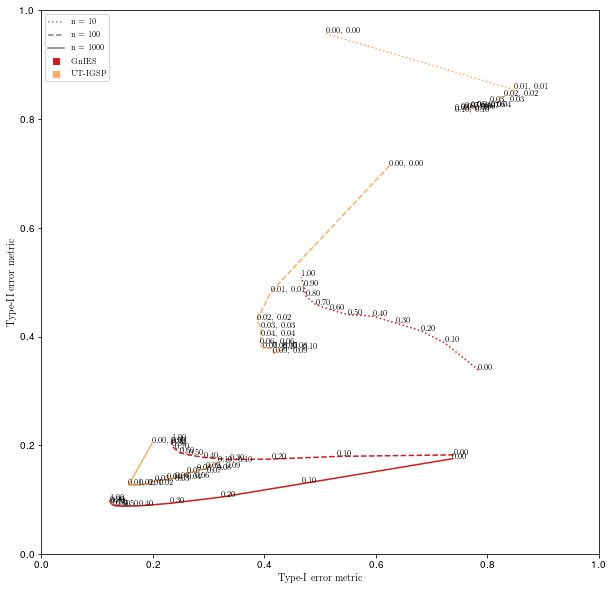

In [71]:
styles = [':', '--', '-']
text = True
marker = None

plt.figure(figsize=(10,10))
ax = plt.gca()

# Plot GnIES
for i,n in enumerate(Ns):
    ax.plot(gnies_x[:,i], gnies_y[:,i], color=colors[0], linestyle=styles[i], marker=marker)
    x,y = gnies_x[:,i], gnies_y[:,i]
    dists = np.sqrt(x**2 + y**2)
    m = dists.argmin()
    print(m, gnies_lambdas[m])
    if text:
        for j,l in enumerate(gnies_lambdas):
            ax.text(gnies_x[j,i], gnies_y[j,i], "%.2f" % l, fontsize=8)
        
print()
# Plot UT-IGSP
for i,n in enumerate(Ns):    
    #ax.scatter(utigsp_x[:,:,i], utigsp_y[:,:,i], label="n=%d" % n, color=colors[i], marker='^')
    idx = list(range(len(utigsp_alphas)))
    x, y = utigsp_x[idx,idx,i], utigsp_y[idx,idx,i]
    dists = np.sqrt(x**2 + y**2)
    m = dists.argmin()
    print(m, utigsp_alphas[m])
    ax.plot(utigsp_x[idx,idx,i], utigsp_y[idx,idx,i], color=colors[1], marker=marker, linestyle=styles[i])
    if text:
        for j,a in enumerate(utigsp_alphas):
            for k,b in enumerate(utigsp_betas):
                if k == j:
                    ax.text(utigsp_x[j,k,i], utigsp_y[j,k,i], "%.2f, %.2f" % (a,b), fontsize=8)

ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel('Type-I error metric')
ax.set_ylabel('Type-II error metric')


# Legend
sample_size_entries = [Line2D([0], [0], linestyle=styles[i], marker=marker, color='gray') for i in range(len(Ns))]
sample_size_str = ["n = %d" % n for n in Ns]

method_entries = [Line2D([0], [0], linewidth=0, marker='s', color=colors[i]) for i in range(2)]
method_str = ['GnIES', 'UT-IGSP']
ax.legend(sample_size_entries + method_entries,
          sample_size_str + method_str,
          prop={'size':8},
          loc='upper left',
        ncol=1)


#plt.legend()

6 0.67
6 0.67
9 1.0

0 1e-05
6 0.06667000000000001
1 0.011120000000000001


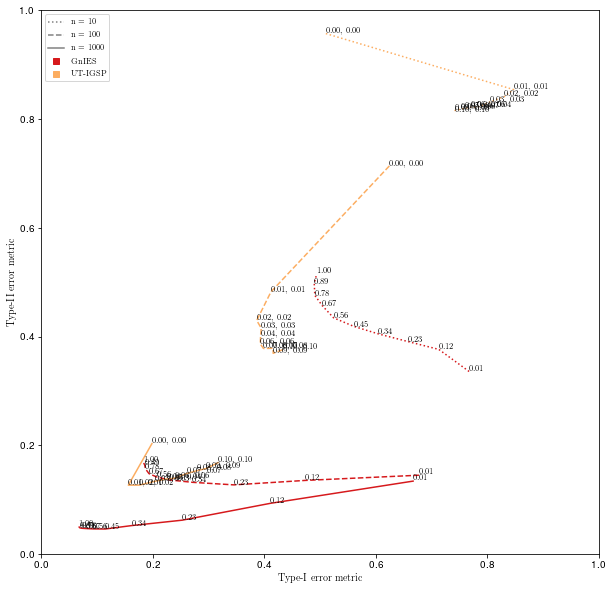

In [26]:
# Above: ranking, below: greedy approach 

### Skeleton recovery

In [73]:
gnies_x = np.nanmean(computed_metrics['gnies'][metrics.type_1_skeleton], axis=(0,3))
gnies_y = 1 - np.nanmean(computed_metrics['gnies'][metrics.type_2_skeleton], axis=(0,3))

utigsp_x = np.nanmean(computed_metrics['ut_igsp'][metrics.type_1_skeleton], axis=(0,4))
utigsp_y = 1 - np.nanmean(computed_metrics['ut_igsp'][metrics.type_2_skeleton], axis=(0,4))

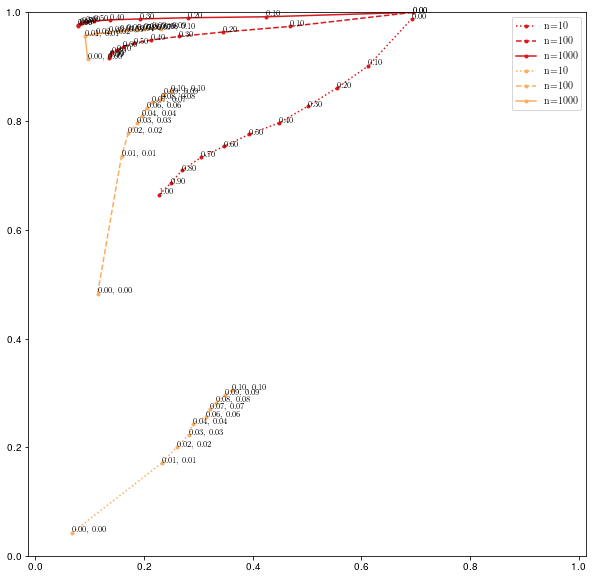

In [74]:
styles = [':', '--', '-']
text = True

plt.figure(figsize=(10,10))
ax = plt.gca()

# Plot GnIES
for i,n in enumerate(Ns):
    ax.plot(gnies_x[:,i], gnies_y[:,i], label="n=%d" % n, color=colors[0], linestyle=styles[i], marker='.')
    if text:
        for j,l in enumerate(gnies_lambdas):
            ax.text(gnies_x[j,i], gnies_y[j,i], "%.2f" % l, fontsize=8)
        
# Plot UT-IGSP
for i,n in enumerate(Ns):    
    #ax.scatter(utigsp_x[:,:,i], utigsp_y[:,:,i], label="n=%d" % n, color=colors[i], marker='^')
    idx = list(range(len(utigsp_alphas)))
    ax.plot(utigsp_x[idx,idx,i], utigsp_y[idx,idx,i], label="n=%d" % n, color=colors[1], marker='.', linestyle=styles[i])
    if text:
        for j,a in enumerate(utigsp_alphas):
            for k,b in enumerate(utigsp_betas):
                if k == j:
                    ax.text(utigsp_x[j,k,i], utigsp_y[j,k,i], "%.2f, %.2f" % (a,b), fontsize=8)
ax.axis('equal')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
plt.legend()

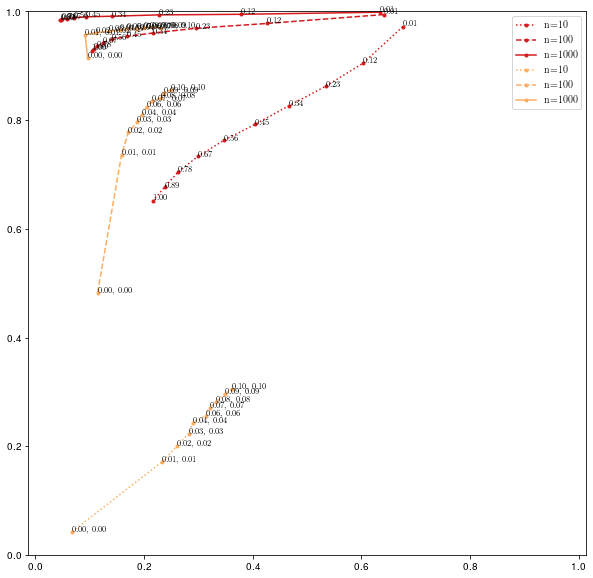

In [16]:
# Above: ranking, below: greedy approach 

### Targets recovery

In [77]:
gnies_x = np.nanmean(computed_metrics['gnies'][metrics.type_1_I], axis=(0,3))
gnies_y = 1 - np.nanmean(computed_metrics['gnies'][metrics.type_2_I], axis=(0,3))

utigsp_x = np.nanmean(computed_metrics['ut_igsp'][metrics.type_1_I], axis=(0,4))
utigsp_y = 1 - np.nanmean(computed_metrics['ut_igsp'][metrics.type_2_I], axis=(0,4))

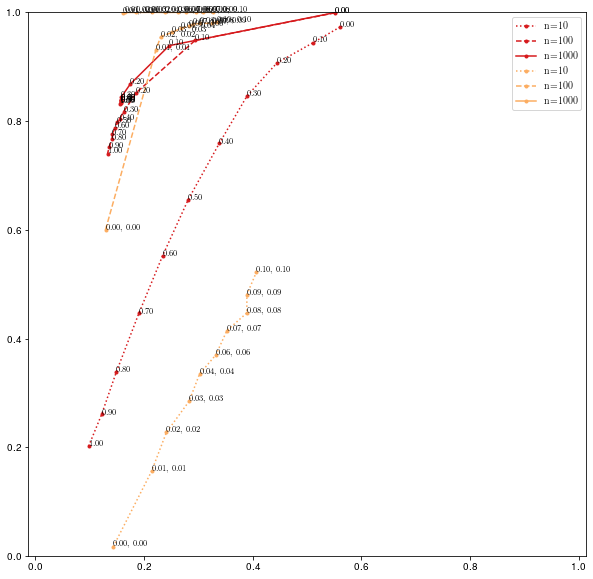

In [78]:
styles = [':', '--', '-']
text = True

plt.figure(figsize=(10,10))
ax = plt.gca()

# Plot GnIES
for i,n in enumerate(Ns):
    ax.plot(gnies_x[:,i], gnies_y[:,i], label="n=%d" % n, color=colors[0], linestyle=styles[i], marker='.')
    if text:
        for j,l in enumerate(gnies_lambdas):
            ax.text(gnies_x[j,i], gnies_y[j,i], "%.2f" % l, fontsize=8)
        
# Plot UT-IGSP
for i,n in enumerate(Ns):    
    #ax.scatter(utigsp_x[:,:,i], utigsp_y[:,:,i], label="n=%d" % n, color=colors[i], marker='^')
    idx = list(range(len(utigsp_alphas)))
    ax.plot(utigsp_x[idx,idx,i], utigsp_y[idx,idx,i], label="n=%d" % n, color=colors[1], marker='.', linestyle=styles[i])
    if text:
        for j,a in enumerate(utigsp_alphas):
            for k,b in enumerate(utigsp_betas):
                if k == j:
                    ax.text(utigsp_x[j,k,i], utigsp_y[j,k,i], "%.2f, %.2f" % (a,b), fontsize=8)
ax.axis('equal')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
plt.legend()

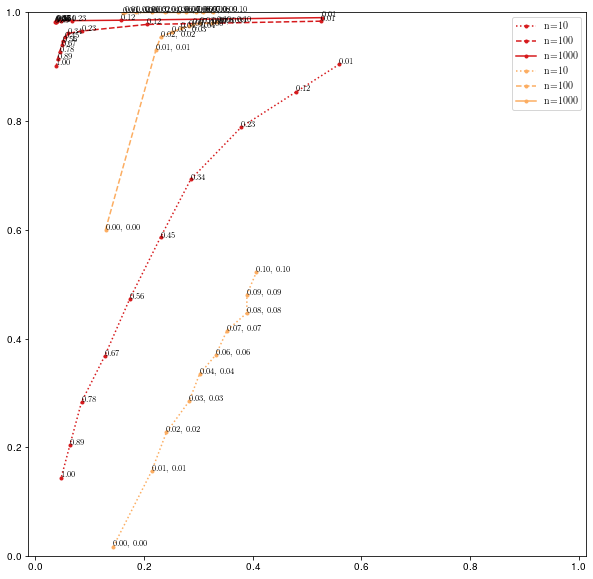

In [18]:
# Above: ranking, below: greedy approach 